In [3]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [4]:
import numpy as np
import pandas as pd
import datetime as dt

## Reflect Tables into SQLALchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [6]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite", echo=False)

In [7]:
# reflect an existing database into a new model
# reflect the tables
Base = automap_base()
Base.prepare(engine, reflect=True)

In [8]:
# View all of the classes that automap found
Base.classes.keys()


['measurement', 'station']

In [9]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

## Bonus Challenge Assignment: Temperature Analysis II

In [11]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, maximum, and average temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# Aug 1 to Aug 7 2010
#print(calc_temps('2010-08-01', '2010-08-07'))
# Aug 1 to Aug 7 2011
#print(calc_temps('2011-08-01', '2011-08-07'))
# Aug 1 to Aug 7 2012
#print(calc_temps('2012-08-01', '2012-08-07'))
# Aug 1 to Aug 7 2013
#print(calc_temps('2013-08-01', '2013-08-07'))
# Aug 1 to Aug 7 2014
#print(calc_temps('2014-08-01', '2014-08-07'))
# Aug 1 to Aug 7 2015
#print(calc_temps('2015-08-01', '2015-08-07'))

# use this data for bar chart
# Aug 1 to Aug 7 2016
trip_avg = (calc_temps('2016-08-01', '2016-08-07'))
print(trip_avg)


[(72.0, 77.79545454545455, 83.0)]


In [12]:
# Use the function `calc_temps` to calculate the tmin, tavg, and tmax 
# for a year in the data set
print(calc_temps('2016-1-1', '2016-12-31'))

[(60.0, 74.27397260273973, 82.0)]


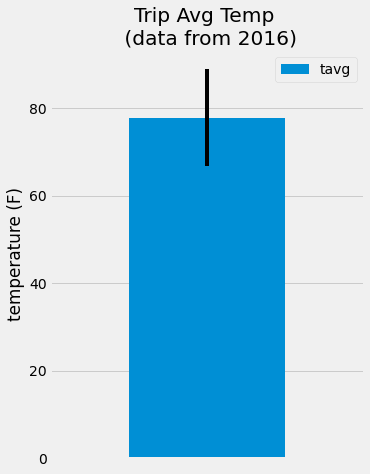

In [13]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for bar height (y value)
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

trip_avg_df = pd.DataFrame(trip_avg, columns=['tmin', 'tavg', 'tmax'])

trip_avg_df.plot.bar(y='tavg', title = 'Trip Avg Temp \n (data from 2016)',rot=90, figsize=(5,7), yerr=(trip_avg_df['tmax'] - trip_avg_df['tmin']))
plt.xticks([])
plt.ylabel("temperature (F)")
plt.show()



### Daily Rainfall Average

In [14]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's 
# matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

# read in .csv files to dataframes
Measurement_df = pd.read_csv("Resources/hawaii_measurements.csv", index_col=[0])
Station_df = pd.read_csv("Resources/hawaii_stations.csv", index_col=[0])

# .loc just the dates - 08-01-2016 to 08-07-2016
dates_df = Measurement_df.loc[(Measurement_df['date'] >='2016-08-01') & (Measurement_df['date'] <='2016-08-07')]
dates_df

# sum prcp by station
dates_prcp_df = dates_df.groupby('station').sum().sort_values('prcp', ascending=False)

#drop 'tobs'
prcp_df = dates_prcp_df.drop(columns=['tobs'])
prcp_df


,prcp
station,
USC00519281,6.02
USC00516128,4.65
USC00513117,3.59
USC00519523,1.30
USC00514830,1.03
USC00519397,0.57
USC00517948,0.18


In [15]:
# join the Station_df to include the station, name, latitude, longitude, and elevation
station_prcp_df = pd.merge(prcp_df, Station_df, on='station')
station_prcp_df

,prcp,name,latitude,longitude,elevation
station,,,,,
USC00519281,6.02,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
USC00516128,4.65,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4
USC00513117,3.59,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
USC00519523,1.30,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
USC00514830,1.03,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
USC00519397,0.57,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
USC00517948,0.18,"PEARL CITY, HI US",21.39340,-157.97510,11.9


### Daily Temperature Normals

In [23]:
# Use this function to calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()

# For example
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [61]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`
def daily_normals(date):
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()

# Set the start and end date of the trip
start_date = '2017-08-01'
end_date = '2017-08-07'

# Use the start and end date to create a range of dates


# Strip off the year and save a list of strings in the format %m-%d


# Use the `daily_normals` function to calculate the normals for each date string 
# and append the results to a list called `normals`.


In [18]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index

In [19]:
# Plot the daily normals as an area plot with `stacked=False`

## Close Session